# CNN Correlations and Statistics #

In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
cnn_df = pd.read_excel('../data/interim/cnn_ready_to_code.xlsx')

In [5]:
cnn_df.head()

,Unnamed: 0,Unnamed: 0.1,identifier,start_snip,end_snip,sentence,cluster,ad_cluster,news_cluster,snip_ad,...,has_prev_appreciate,has_next_appreciate,has_prev_ahead,has_prev_return,has_prev_after this,has_prev_go away,has_next_good evening,has_prev_applause,has_next_applause,has_prev_tuned
0,0,0,CNNW_20190528_060000_CNN_Newsroom_Live,0,60,"now the fastest, most reliable internet can he...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,CNNW_20190528_060000_CNN_Newsroom_Live,0,60,"that's simple, easy, awesome.",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,CNNW_20190528_060000_CNN_Newsroom_Live,0,60,taxi!,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,CNNW_20190528_060000_CNN_Newsroom_Live,0,60,should i have stopped her?,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,CNNW_20190528_060000_CNN_Newsroom_Live,0,60,save hundreds of dollars a year when you get i...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cnn_df = cnn_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [9]:
cnn_df = cnn_df.fillna(0)

In [7]:
for col in cnn_df.columns:
    print(col)

identifier
start_snip
end_snip
sentence
cluster
ad_cluster
news_cluster
snip_ad
isad
contributor
runtime
start_time
stop_time
subjects
topic_0
topic_1
topic_2
topic_3
topic_4
topic_5
topic_6
topic_7
topic_8
topic_9
topic_10
topic_11
topic_12
topic_13
topic_14
topic_15
topic_16
topic_17
topic_18
topic_19
topic_20
topic_21
topic_22
topic_23
topic_24
topic_25
topic_26
topic_27
topic_28
topic_29
topic_30
topic_31
topic_32
topic_33
topic_34
topic_35
topic_36
topic_37
topic_38
topic_39
topic_40
topic_41
topic_42
topic_43
topic_44
topic_45
topic_46
topic_47
topic_48
topic_49
topic_50
topic_51
topic_52
topic_53
topic_54
topic_55
topic_56
topic_57
topic_58
topic_59
topic_60
topic_61
topic_62
topic_63
topic_64
topic_65
topic_66
topic_67
topic_68
topic_69
topic_70
topic_71
topic_72
topic_73
topic_74
has_prev_back
has_next_back
has_next_welcome
has_prev_miss
has_next_good morning
has_prev_next
has_next_talk
has_prev_appreciate
has_next_appreciate
has_prev_ahead
has_prev_return
has_prev_after this


In [13]:
def plot_correlation_matrix(df, fig_name, title):
    fig = plt.figure(figsize=(20,10))
    _ = plt.title(title)
    c= df.corr()
    sns.heatmap(c,cmap='BrBG',annot=True)
    fig.savefig('../reports/figures/' + fig_name + '.png')
    plt.show()

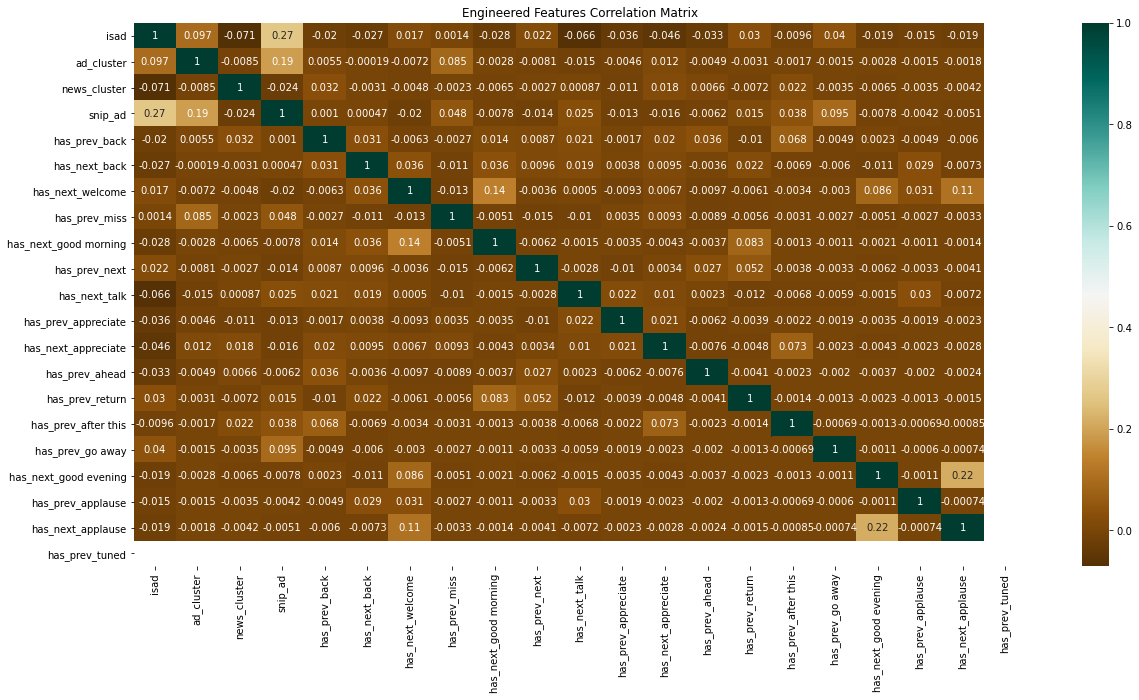

In [14]:
# I'm curious to see what correlation there is between my engineered features

corr_df = cnn_df[['isad', 'ad_cluster', 'news_cluster', 'snip_ad', 'has_prev_back' , 'has_next_back', 
                  'has_next_welcome', 'has_prev_miss', 'has_next_good morning', 'has_prev_next',
                  'has_next_talk', 'has_prev_appreciate', 'has_next_appreciate', 'has_prev_ahead',
                  'has_prev_return', 'has_prev_after this', 'has_prev_go away', 'has_next_good evening',
                  'has_prev_applause', 'has_next_applause', 'has_prev_tuned']]

plot_correlation_matrix(corr_df, 'eng_corr', 'Engineered Features Correlation Matrix')

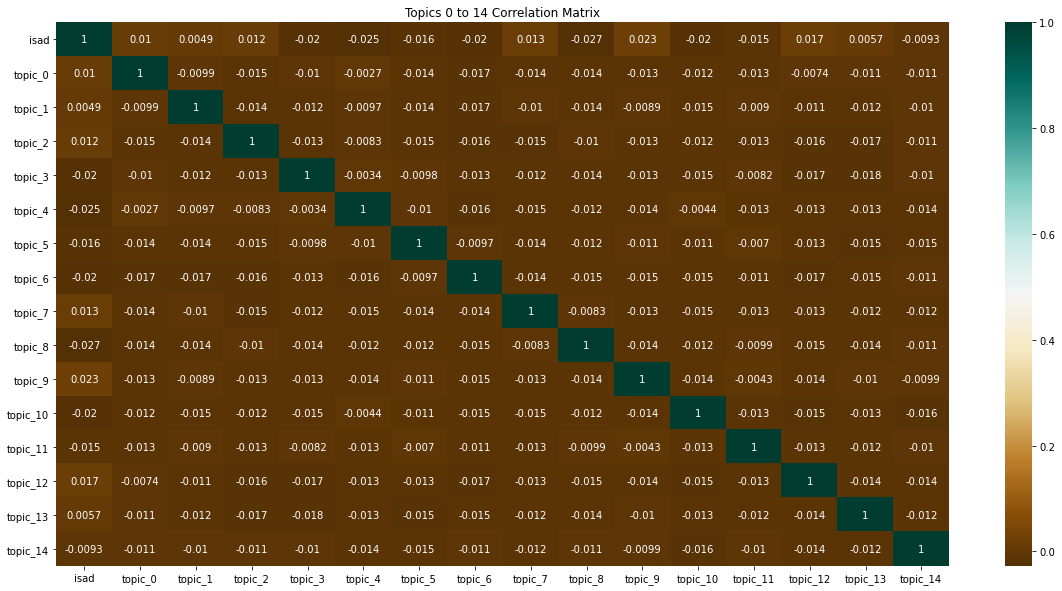

In [17]:
topics_0_14_df = cnn_df[['isad', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
                         'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 
                         'topic_13', 'topic_14']]
plot_correlation_matrix(topics_0_14_df, 'topic_0_14_corr', 'Topics 0 to 14 Correlation Matrix')

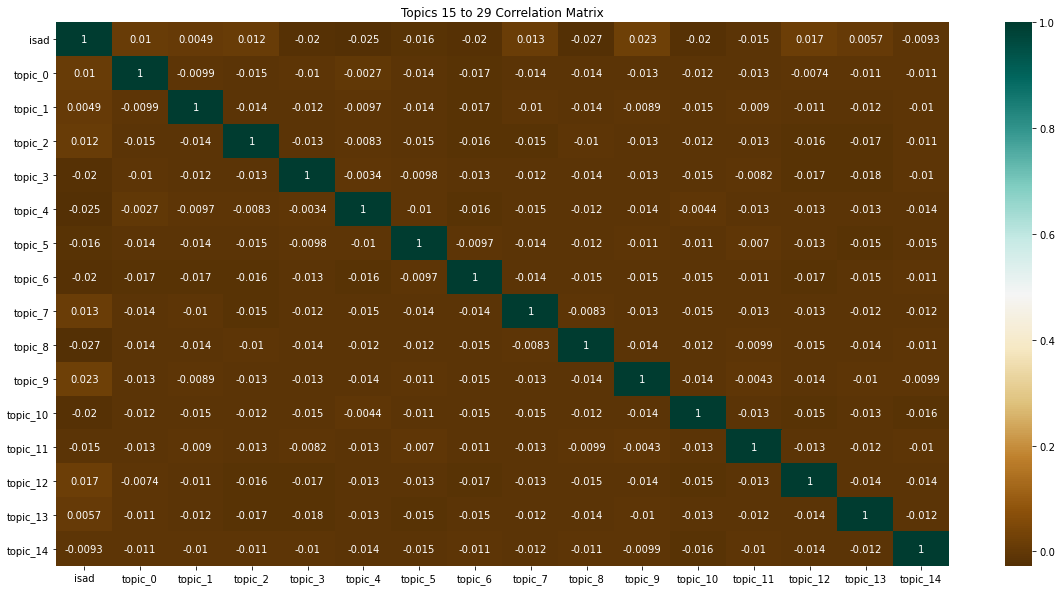

In [21]:
column_list = ['topic_' + str(i) for i in range (15, 30)]
column_list = ['isad'] + column_list

topics_15_29_df = cnn_df[column_list]
plot_correlation_matrix(topics_0_14_df, 'topic_15_29_corr', 'Topics 15 to 29 Correlation Matrix')


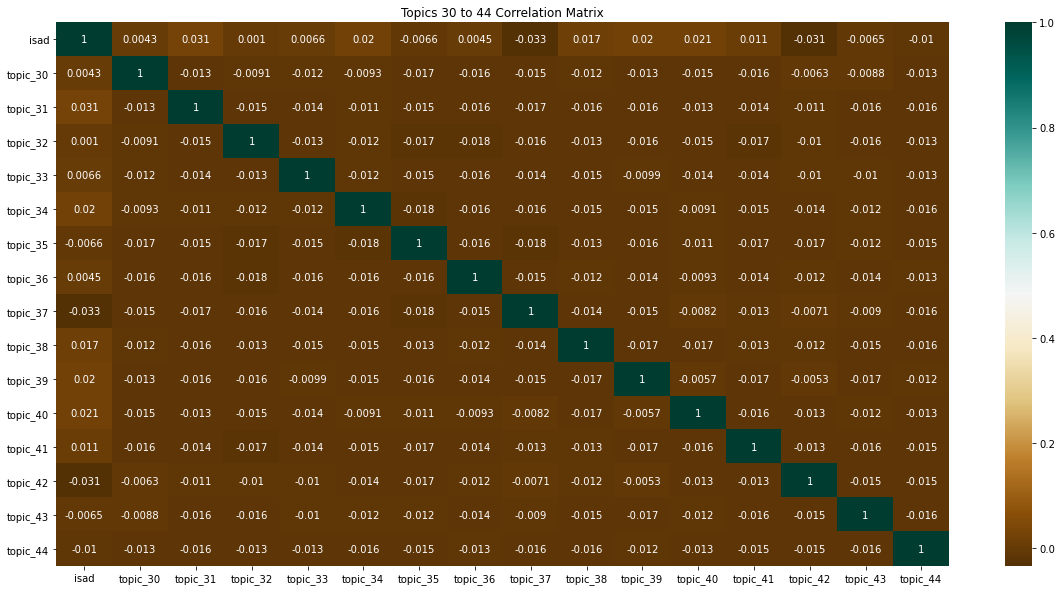

In [22]:
column_list = ['topic_' + str(i) for i in range (30, 45)]
column_list = ['isad'] + column_list

topics_df = cnn_df[column_list]
plot_correlation_matrix(topics_df, 'topic_30_44_corr', 'Topics 30 to 44 Correlation Matrix')

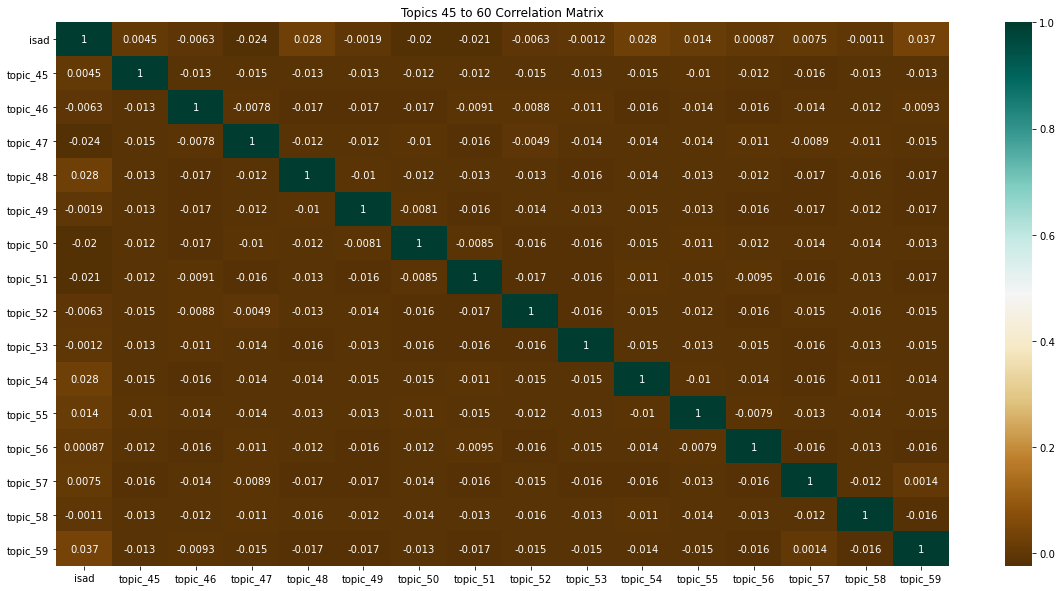

In [23]:
column_list = ['topic_' + str(i) for i in range (45, 60)]
column_list = ['isad'] + column_list

topics_df = cnn_df[column_list]
plot_correlation_matrix(topics_df, 'topic_45_60_corr', 'Topics 45 to 60 Correlation Matrix')

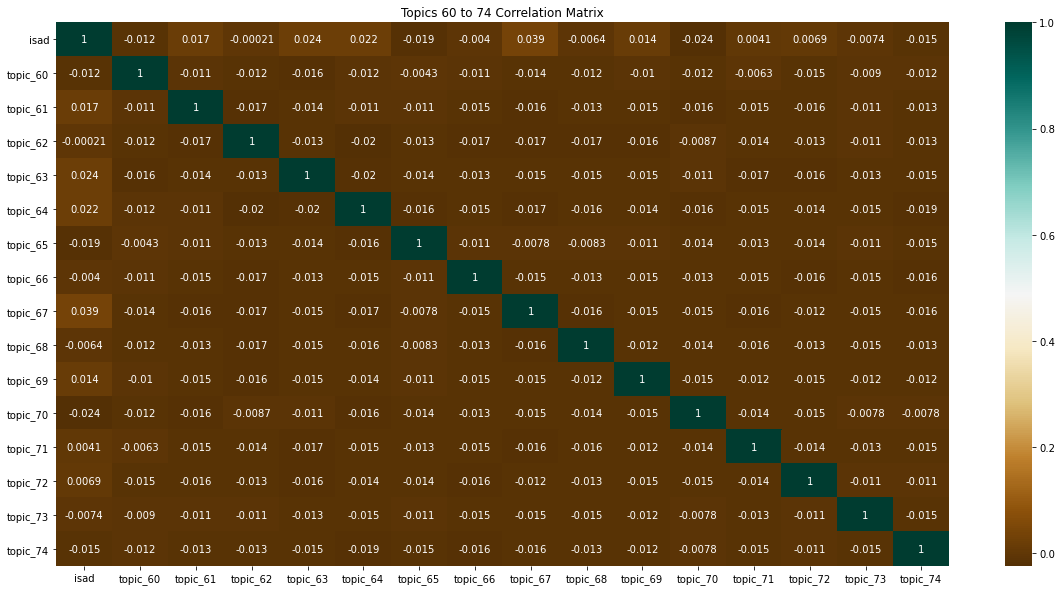

In [24]:
column_list = ['topic_' + str(i) for i in range (60, 75)]
column_list = ['isad'] + column_list

topics_df = cnn_df[column_list]
plot_correlation_matrix(topics_df, 'topic_60_to_74_corr', 'Topics 60 to 74 Correlation Matrix')